In [103]:
import pandas as pd
import numpy as np

In [104]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [105]:
df = pd.read_csv('aug_train.csv', usecols = ['enrollee_id', 'training_hours', 'target'])

In [106]:
X = df.iloc[: , 0 : 2]
y = df.iloc[: , -1]

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
clf = DecisionTreeClassifier()

In [109]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [110]:
Y_pred = clf.predict(X_test)

In [111]:
accuracy_score(Y_pred, Y_test)

0.6328288100208769

In [112]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy'))

0.6264748687703385

In [113]:
kbin_enrollee_id = KBinsDiscretizer(n_bins = 20, encode = 'ordinal', strategy = 'quantile')
kbin_training_hours = KBinsDiscretizer(n_bins = 20, encode = 'ordinal', strategy = 'quantile')

In [114]:
trf = ColumnTransformer([
    ('enroll', kbin_enrollee_id, [0]),
    ('training',kbin_training_hours, [1])
])

In [115]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [116]:
trf.named_transformers_['enroll'].n_bins_

array([20])

In [117]:
trf.named_transformers_['training'].bin_edges_

array([array([  1.,   7.,  11.,  15.,  19.,  23.,  27.,  32.,  37.,  42.,  47.,
               52.,  58.,  68.,  78.,  88., 102., 114., 146., 188., 336.])     ],
      dtype=object)

In [118]:
output = pd.DataFrame({
    'enroll' : X_train['enrollee_id'],
    'enroll_trf' : X_train_trf[:, 0],
    'training' : X_train['training_hours'],
    'training_trf' : X_train_trf[: , 1]
})

In [119]:
output['enroll_labels'] = pd.cut(x = X_train['enrollee_id'],
                                bins = trf.named_transformers_['enroll'].bin_edges_[0].tolist())
output['training_labels'] = pd.cut(x = X_train['training_hours'],
                                  bins = trf.named_transformers_['training'].bin_edges_[0].tolist())

In [120]:
output

,enroll,enroll_trf,training,training_trf,enroll_labels,training_labels
13330,13163,7.0,16,3.0,"(11959.75, 13579.0]","(15.0, 19.0]"
18074,9357,5.0,262,19.0,"(8594.75, 10348.0]","(188.0, 336.0]"
366,604,0.0,24,5.0,"(1.0, 1787.25]","(23.0, 27.0]"
10662,19033,11.0,35,7.0,"(18634.0, 20289.0]","(32.0, 37.0]"
13974,4825,2.0,43,9.0,"(3556.5, 5220.75]","(42.0, 47.0]"
...,...,...,...,...,...,...
11284,5471,3.0,25,5.0,"(5220.75, 6907.0]","(23.0, 27.0]"
11964,4815,2.0,122,17.0,"(3556.5, 5220.75]","(114.0, 146.0]"
5390,25935,15.0,57,11.0,"(25186.0, 26877.0]","(52.0, 58.0]"
860,6525,3.0,16,3.0,"(5220.75, 6907.0]","(15.0, 19.0]"


In [128]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_trf, Y_train)

DecisionTreeClassifier()

In [129]:
Y_pred2 = clf.predict(X_test_trf)

In [137]:
accuracy_score(Y_pred2, Y_test)

0.7515657620041754

In [131]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy'))

0.6303371907313431

In [132]:
def discretize(bins, strategy):
    kbin_enroll = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbin_training = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)

    trf = ColumnTransformer([
        ('enroll', kbin_enroll,[0]),
        ('training', kbin_training, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy')))

    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    plt.hist(X['enrollee_id'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[ : , 0], color = 'red')
    plt.title('After')

    plt.show()

    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    plt.hist(X['training_hours'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[ : , 1], color = 'red')
    plt.title('After')

    plt.show()

0.6285105774105103


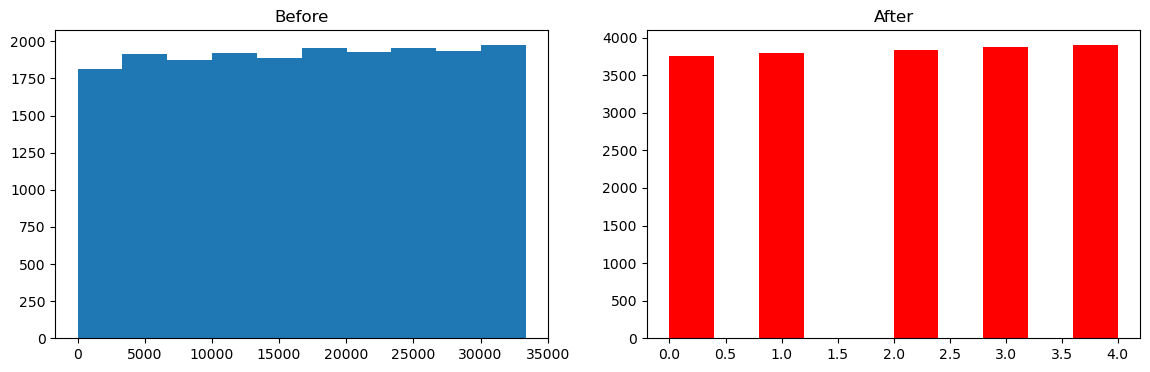

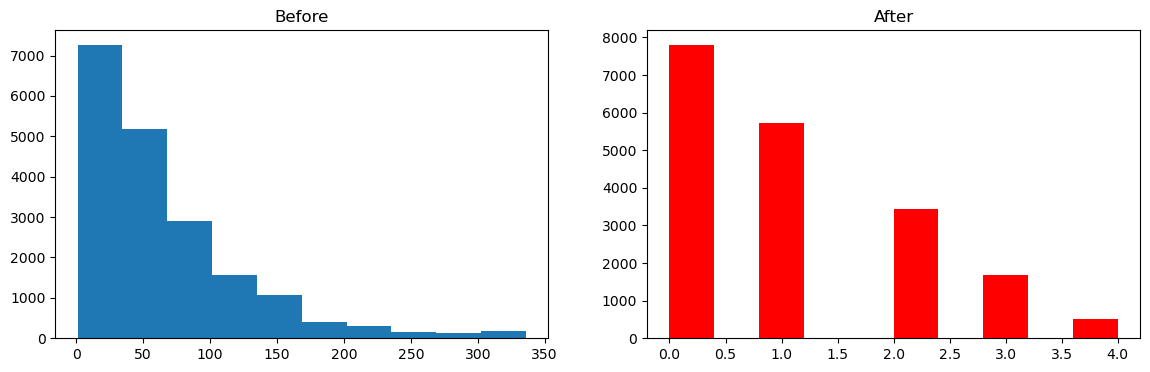

In [136]:
discretize(5, 'kmeans')